In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# dropping irrelevant columns
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# encoding categorical variable - Gender
label_encoder_gender = LabelEncoder()
df["Gender"] = label_encoder_gender.fit_transform(df["Gender"])
df.head()

# o for female
# 1 for male

print(df["Gender"].value_counts())

Gender
1    5457
0    4543
Name: count, dtype: int64


In [13]:
# encoding categorical variable - Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()

geo = onehot_encoder_geo.fit_transform(df[["Geography"]])
geo = geo.toarray()
geo

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], shape=(10000, 3))

In [14]:
cols = onehot_encoder_geo.get_feature_names_out(["Geography"])
cols

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [15]:
# converting one hot encode values to a dataframe
geo_df = pd.DataFrame(geo,columns=cols)
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [16]:
#combining ohe values with original df
# pd.concat() expects a list or tuple of dataframes and then the axis
df = pd.concat([df.drop("Geography",axis=1),geo_df],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [17]:
#saving preprocesed label and ohe encoded in pickle files 

import pickle
with open("label_encoder_gender.pkl","wb") as file:
    pickle.dump(label_encoder_gender,file)

with open("onehot_encoder_geo.pkl","wb") as file:
    pickle.dump(onehot_encoder_geo,file)


In [18]:
# reading those pickle files

with open("label_encoder_gender.pkl","rb") as file:
    loaded_df = pickle.load(file)

print(loaded_df)

LabelEncoder()



X = feature variables (independent variables).

y = target variable (dependent variable).

test_size=0.2 → 20% of the dataset will be used for testing, 80% for training.

random_state=42 → ensures the split is reproducible (same split every time).

After this:

X_train → training features

X_test → testing features

y_train → training labels

y_test → testing labels

## why is scaling done 

Many ML algorithms (like Logistic Regression, SVM, KNN, Neural Nets) perform poorly if features have very different ranges.

Example:

Age ranges from 18–90

Balance ranges from 0–200000

CreditScore ranges from 350–850

Without scaling, the model may give too much importance to Balance just because it has bigger numbers.

Scaling ensures fair contribution of all features.

fit_transform(X_train)

Calculates the mean and standard deviation for each column in X_train.

Applies transformation:

​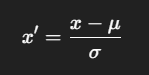


→ Result: Each feature has mean = 0, std = 1.

transform(X_test)

Uses the same mean & std learned from X_train.

This avoids data leakage (you never want test data influencing training statistics).

In [19]:
## dividing dataset into independent and dependent features 
X = df.drop("Exited",axis=1) # evrythinng excpt exited column
y = df["Exited"]

#splitting in training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# scaling these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# saving scaled data in pickle format
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

## why not scale before splitting
When we scale, we usually use something like StandardScaler or MinMaxScaler.
These scalers learn parameters from the data:

StandardScaler → learns mean and std

MinMaxScaler → learns min and max

If you fit the scaler before splitting, then:

The test set’s information (its mean, std, min, max) will “leak” into the training process.

That means your model indirectly “saw” the test data during training → which makes evaluation unrealistic / biased.

Why we scale X (features) but usually not y (target)?

X (features)

Features can have very different ranges (e.g., age = 20–80, salary = 20k–200k).

Many ML models (e.g., logistic regression, SVM, KNN, neural nets) are sensitive to scale.

So, we normalize/standardize X to ensure all features contribute equally.

y (target variable)

In most cases, y is the label we want to predict (e.g., 0/1 in classification, or actual values in regression).

We don’t scale y for classification because it usually represents categories (e.g., 0, 1, 2). Scaling those would destroy the meaning.

For regression, y can be scaled in some situations (especially if values are very large), but:

The model output would then also be in the scaled range.

You’d need to inverse-transform predictions back to the original scale to interpret results.

✅ Rule of thumb:

Classification tasks:

Scale only X_train and X_test.

Never scale y (since it’s categorical).

Regression tasks:

Usually, scale only X.

Sometimes, scale y as well if the values are very large or vary a lot, but then always apply scaler.inverse_transform() to predictions to interpret correctly.

In [ ]:
X_train.shape # -- 13 means 13 column (features)

(10000, 13)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [23]:
## building ann
model = Sequential([
    Dense(64,activation="relu",input_shape=(X_train.shape[1],)),
    ## first hidden layer -- H1
    # input_shape -- only for the first hidden layer 
    # the layers after that will anyhow will be connected 
    Dense(32,activation="relu"), #-- Hl2
    Dense(1,activation="sigmoid") ## output layer
])

C:\Users\dabaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# compiling the model
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
l = tensorflow.keras.losses.BinaryCrossentropy()

In [ ]:
model.compile(optimizer=opt,loss=l,metrics=['accuracy'])

## What metrics does:
Metrics are performance measures.
During training and validation, Keras will show them in logs/plots.
Example:
If you set metrics=['accuracy'], you’ll see "acc" or "accuracy" per epoch.
The model still optimizes only the loss, not the metric.

In [62]:
# tensorboard for logs
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [63]:
# early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)


What is Early Stopping?

It’s a regularization technique to prevent overfitting.

Instead of training for a fixed number of epochs, it stops training automatically when the monitored metric stops improving.

Example: if validation loss doesn’t improve for 12 epochs (your patience=12), training will stop.

restore_best_weights=True

Very important ✅

If set to True, when training stops, it rolls back the model weights to the best epoch (the one with the best monitored metric, e.g., lowest val_loss).

If False, it keeps the weights from the last epoch (which might be overfitted).

Why is EarlyStopping used?

Prevents overfitting (model starts memorizing training data instead of generalizing).

Saves time and computational resources (stops unnecessary training).

Ensures you keep the best-performing model.


In [ ]:
# training the model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]

## tensorflow callback for visulaizing and logs 
## early stoping to avoid overfitting
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8744 - loss: 0.3019 - val_accuracy: 0.8635 - val_loss: 0.3375
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8746 - loss: 0.3007 - val_accuracy: 0.8630 - val_loss: 0.3379
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.2997 - val_accuracy: 0.8630 - val_loss: 0.3382
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.2988 - val_accuracy: 0.8630 - val_loss: 0.3385
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.2980 - val_accuracy: 0.8635 - val_loss: 0.3389
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8760 - loss: 0.2973 - val_accuracy: 0.8625 - val_loss: 0.3392
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8756 - loss: 0.2966 - val_accuracy: 0.8630 - val_loss: 0.3395
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8756 - loss: 0.2960 - val_accu

In [67]:
model.save("model.h5")

In [58]:
# tensorboard session
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [59]:
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

Name: tensorboard
Version: 2.20.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\dabaa\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, grpcio, markdown, numpy, packaging, pillow, protobuf, setuptools, tensorboard-data-server, werkzeug
Required-by: tensorflow
